### 선형회귀(Linear Regression)

In [1]:
# 사이킷런 당뇨병 환자 데이터 가져오기
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [2]:
# 입력 데이터와 타켓 데이터의 크기 
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


In [3]:
# 입력 데이터 보기
diabetes.data[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034]])

In [4]:
# Target Data
diabetes.target[:3]

array([151.,  75., 141.])

### 컬럼
3번째 bmi(체질량 지수)

### 당뇨병 환자 데이터 시각화

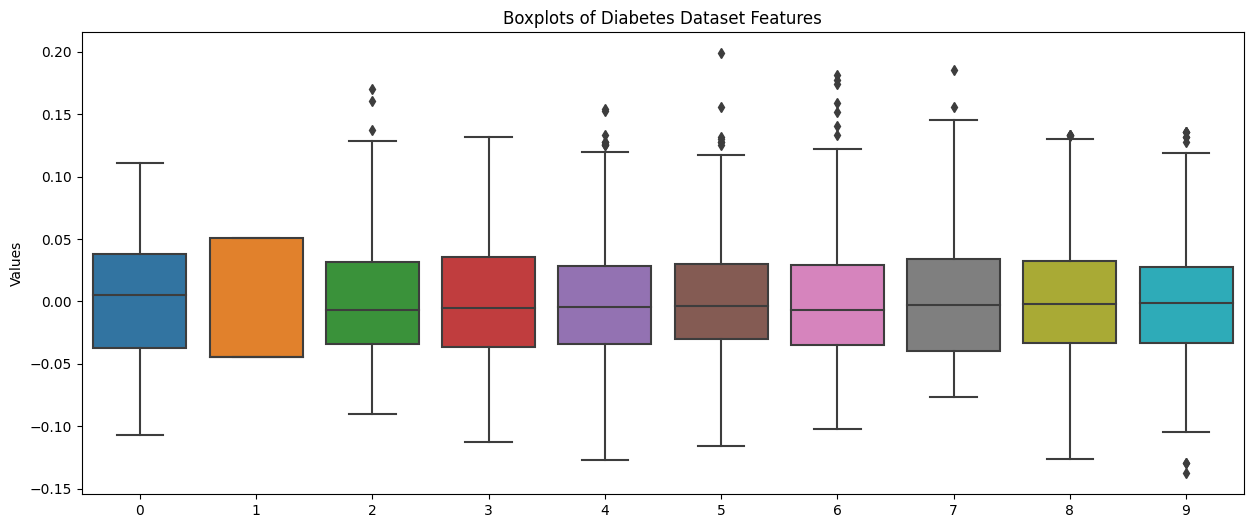

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=diabetes.data)
plt.title("Boxplots of Diabetes Dataset Features")

plt.ylabel("Values")
plt.show()

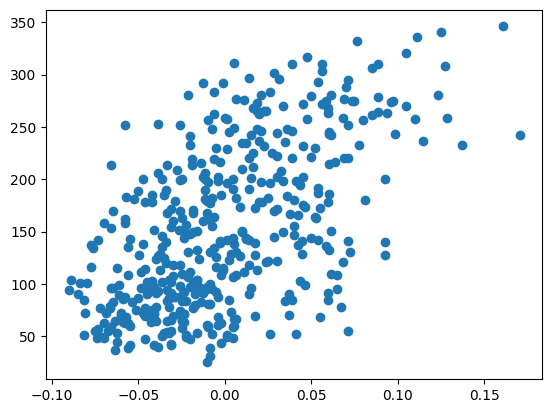

In [6]:
# 산점도 : 3번째 특성 (bmi)

plt.scatter(
    diabetes.data[:,2],
    diabetes.target
)

plt.show()

In [7]:
# 데이터 준비
x = diabetes.data[:,2]
y = diabetes.target

#### 예측값으로 올바른 모델 찾기
훈련데이터와 잘맞는 w와 b를 찾는 방법(Y^ = wX + b)      
(1) 무작위로 w와 b를 정한다.     
(2) x에서 샘플 하나를 선택하여 Y^을 계산한다.    
(3) Y^과 선택한 샘플의 진짜 Y를 비교한다. (예측값과 정답값 비교하기)    
(4) Y^이 Y와 가까워지도록 w와 b를 조정한다. (모델 조정)    
(5) 모든 샘플이 처리될때까지 (2) ~ (5)를 반복한다.   

In [8]:
# w와 b를 초기화 
w = 1.0
b = 1.0

In [9]:
y_hat = w * x[0] + b
y_hat

1.0616962065186832

In [10]:
y[0]

151.0

In [11]:
# 증가 확인
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc

1.0678658271705517

In [12]:
# 접근가능 정도 : 변화율 
w_rate  = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868429

w_rate = (y_hat_inc - y_hat) / (w_inc - w)    
= ((x[0] * w_inc + b) -(x[0] * w + b)) / (w_inc - w)    
= x[0] * (w_inc - w) / (w_inc - w)      
= x[0]    

In [13]:
# 변화율로 가중치 업데이트 
w_new = w + w_rate
w_new

1.0616962065186843

In [14]:
# b를 0.1증가
b_inc = b + 0.1
y_hat_inc = x[0] * w + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186833
1.0


b_rate = (y_hat_inc - y_hat) / (b_inc - b)   
= ((x[0]*w+b_inc) - (x[0]*w+b)) / (b_inc - b)    

= b_inc - b / b_inc - b = 1    


In [15]:
b_new = b + 1
b_new

2.0

---
### 오차 역전파(back propagation)로 가중치와 절편을 더 적절하게 업데이트 하기 
: 오차와 변화율을 곱하여 가중치 업데이트 하기 

In [16]:
# x[0]일때 w의 변화율과 b의 변화율에 오차를 곱한다. 
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555903848 150.9383037934813


In [18]:
# 두번째 샘플 x[1]을 사용하고 오차를 구하고 새로운 w와 b를 구한다.
y_hat = x[1] * w_new + b_new
err = y[1] - y_hat

w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616380695 75.52764127612656


In [19]:
# 두번째 샘플 x[2]을 사용하고 오차를 구하고 새로운 w와 b를 구한다.
y_hat = x[2] * w_new + b_new
err = y[2] - y_hat

w_rate = x[2]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

17.014719208776086 140.3718013346938


---
### 전체 샘플을 반복하기

In [20]:
a = [1,2,3]
b = [4,5,6]

for a_i, b_i in zip(a,b):
    print(a_i, b_i)

1 4
2 5
3 6


In [21]:
# 전체 샘플로 구성하기

w=b=1

for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

587.8654539985616 99.4093556453094


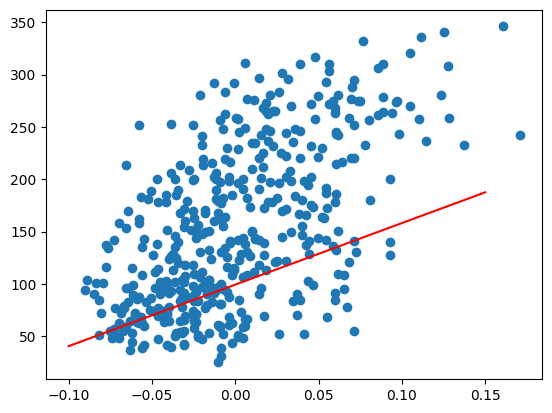

In [23]:
# 산점도에 직선을 넣어 잘 되었는지 확인하기

plt.scatter(x, y)

pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)

plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    color = 'red'
)

plt.show()

In [25]:
print(pt1)
print(pt2)

(-0.1, 40.62281024545324)
(0.15, 187.58917374509366)


-----
### Epoch(에포크)로 반복하기
:경사하강법에서는 보통 주어진 훈련데이터로 학습을 여러번 반복합니다. 이를 Epoch라고 합니다.

In [26]:
# epoch = 100

w=b=1
for _ in range(1, 100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
print(w, b)

913.5973364346786 123.39414383177173


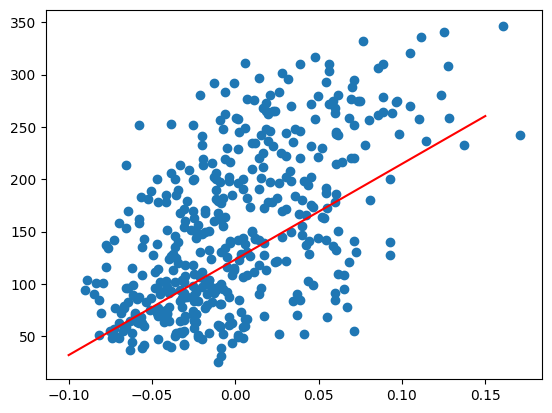

In [27]:
# 산점도에 직선을 넣어 잘 되었는지 확인하기

plt.scatter(x, y)

pt1 = (-0.1, -0.1*w+b)
pt2 = (0.15, 0.15*w+b)

plt.plot(
    [pt1[0], pt2[0]],
    [pt1[1], pt2[1]],
    color = 'red'
)

plt.show()

---
### 손실함수와 경사 하강법
#### 손실함수 ?
- 예상한 값과 실제값의 차이를 함수로 정의한것
- 손실함수의 차이를 줄이를 방법으로 경사 하강법을 사용

#### 회귀의 손실함수
- 제곱의 오차(Squared Error)를 사용합니다.
- SE = (y - y^)<sup>2</sup>

---
Class 만들기

In [28]:
class Neuron:
    # 초기화 작업
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    
    # 정방향 계산 
    def forpass(self, x):
        y_hat = x * self.w + self.b # 직선방정식 계산 
        return y_hat

    # 역방향 계산(오차율)
    def backprop(self, x, err):
        w_grad = x * err # 가중치에 대한 그래디언트를 계산 
        b_grad = 1 * err # 절편에 대한 그래디언트를 계산 
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        for _ in range(epochs):
            for x_i, y_i in zip(x, y):
                y_hat = self.forpass(x_i) # 정방향 계산 
                err = (y_i - y_hat) # 오차 -> 손실함수 
                w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산 
                self.w += w_grad
                self.b += b_grad
        return self.w, self.b 
    

In [29]:
neuron = Neuron()
w, b = neuron.fit(x, y, epochs=100)
print(w, b)

913.5973364346786 123.39414383177173
